In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cartoon = cv2.imread("/content/drive/MyDrive/images/cartoon.bmp")
cartoon_y = cv2.imread("/content/drive/MyDrive/images/cartoon_y.jpg")
girl = cv2.imread("/content/drive/MyDrive/images/girl.png") #grayscale image
girl_y = cv2.imread("/content/drive/MyDrive/images/girl_y.jpg")
fingerprint = cv2.imread("/content/drive/MyDrive/images/fingerprint.jpg")
fingerprint_y = cv2.imread("/content/drive/MyDrive/images/fingerprint_y.jpg")

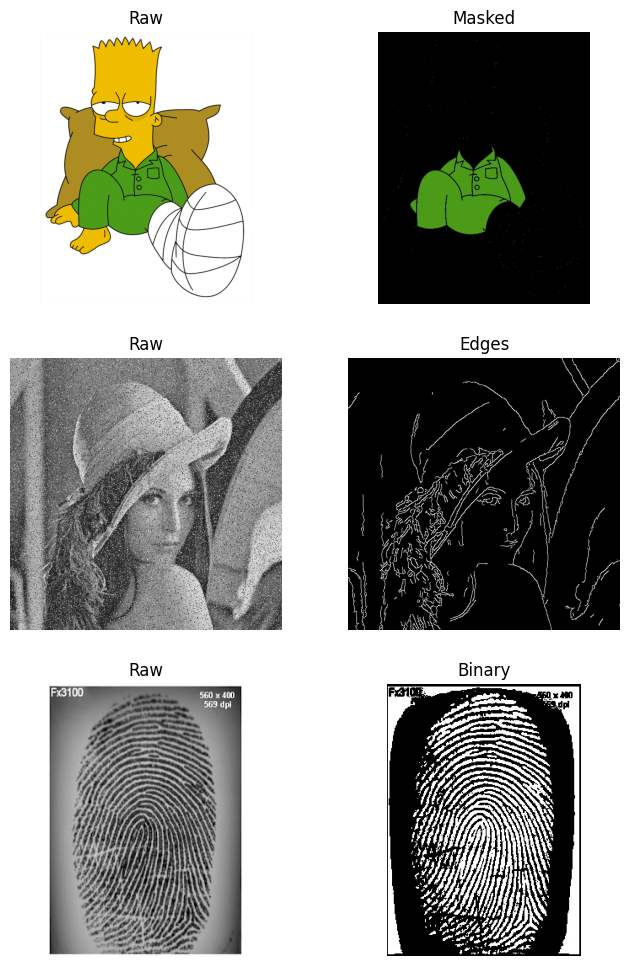

In [4]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

In [55]:
image_rgb = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)
lower_green = np.array([0, 100, 0], dtype="uint8")
upper_green = np.array([100, 255, 100], dtype="uint8")
mask = cv2.inRange(image_rgb, lower_green, upper_green)
black_image = np.zeros_like(image_rgb)
cartoon_y_mentee = np.where(mask[:, :, None] == 255, image_rgb, black_image)

In [56]:
blurred_image = cv2.GaussianBlur(girl, (5, 5), 5)
edges = cv2.Canny(blurred_image, 50, 150)
girl_y_mentee = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

In [57]:
gray_image = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
fingerprint_y_mentee = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2RGB)

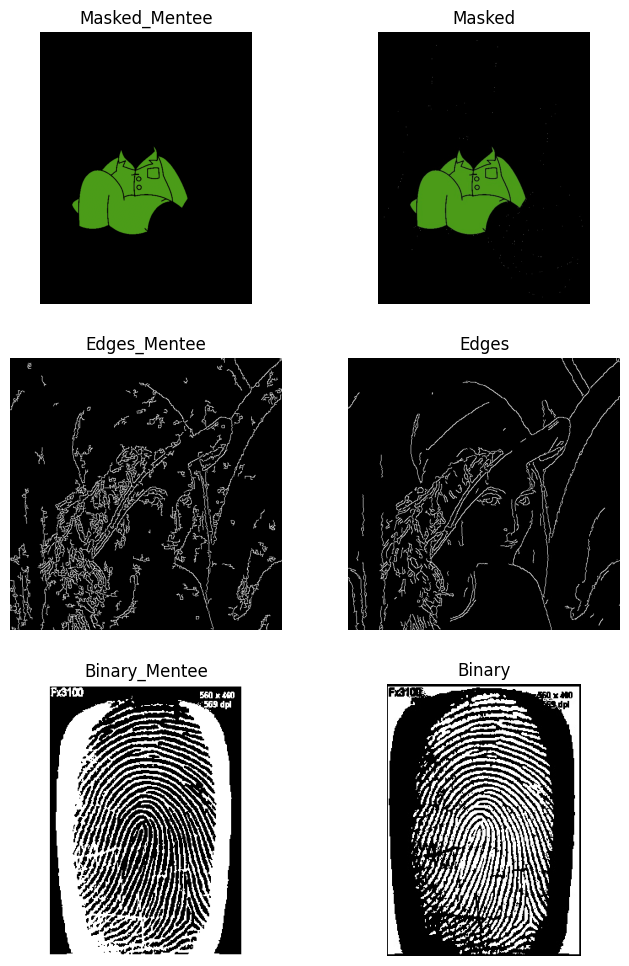

In [58]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()